# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch
#from ddpg_agent import Agent
from ddpg_agent_tennis import Agent

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 753	Average Score: 0.20
Episode 754	Average Score: -0.00
Episode 755	Average Score: 0.05
Episode 756	Average Score: 0.05
Episode 757	Average Score: 0.05
Episode 758	Average Score: 0.05
Episode 759	Average Score: 0.05
Episode 760	Average Score: 0.05
Episode 761	Average Score: 0.05
Episode 762	Average Score: 0.05
Episode 763	Average Score: 0.05
Episode 764	Average Score: 0.05
Episode 765	Average Score: 0.05
Episode 766	Average Score: -0.00
Episode 767	Average Score: 0.05
Episode 768	Average Score: 0.05
Episode 769	Average Score: 0.05
Episode 770	Average Score: 0.05
Episode 771	Average Score: 0.05
Episode 772	Average Score: 0.05
Episode 773	Average Score: 0.05
Episode 774	Average Score: 0.05
Episode 775	Average Score: 0.05
Episode 776	Average Score: 0.05
Episode 777	Average Score: 0.05
Episode 778	Average Score: 0.05
Episode 779	Average Score: 0.05
Episode 780	Average Score: 0.05
Episode 781	Average Score: 0.05
Episode 782	Average Score: 0.05
Episode 783	Average Score: 0.05
Episod

Episode 1009	Average Score: 0.05
Episode 1010	Average Score: 0.15
Episode 1011	Average Score: 0.05
Episode 1012	Average Score: 0.25
Episode 1013	Average Score: 0.20
Episode 1014	Average Score: 0.15
Episode 1015	Average Score: 0.25
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: 0.15
Episode 1018	Average Score: 0.25
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: 0.15
Episode 1021	Average Score: 0.05
Episode 1022	Average Score: 0.05
Episode 1023	Average Score: 0.05
Episode 1024	Average Score: 0.05
Episode 1025	Average Score: 0.15
Episode 1026	Average Score: 0.25
Episode 1027	Average Score: -0.00
Episode 1028	Average Score: 0.25
Episode 1029	Average Score: 0.20
Episode 1030	Average Score: 0.20
Episode 1031	Average Score: 0.15
Episode 1032	Average Score: 0.25
Episode 1033	Average Score: -0.00
Episode 1034	Average Score: 0.15
Episode 1035	Average Score: 0.25
Episode 1036	Average Score: 0.25
Episode 1037	Average Score: 0.10
Episode 1038	Average Score: 0.25
Episod

Episode 1257	Average Score: 0.25
Episode 1258	Average Score: 0.25
Episode 1259	Average Score: 0.25
Episode 1260	Average Score: 0.30
Episode 1261	Average Score: 0.25
Episode 1262	Average Score: 0.25
Episode 1263	Average Score: 0.25
Episode 1264	Average Score: 0.30
Episode 1265	Average Score: 0.25
Episode 1266	Average Score: 0.25
Episode 1267	Average Score: 0.05
Episode 1268	Average Score: 0.25
Episode 1269	Average Score: 0.25
Episode 1270	Average Score: 0.25
Episode 1271	Average Score: 0.05
Episode 1272	Average Score: 0.25
Episode 1273	Average Score: -0.00
Episode 1274	Average Score: 0.25
Episode 1275	Average Score: 0.25
Episode 1276	Average Score: 0.25
Episode 1277	Average Score: 0.25
Episode 1278	Average Score: 0.25
Episode 1279	Average Score: 0.30
Episode 1280	Average Score: 0.25
Episode 1281	Average Score: 0.25
Episode 1282	Average Score: 0.25
Episode 1283	Average Score: 0.30
Episode 1284	Average Score: 0.25
Episode 1285	Average Score: 0.25
Episode 1286	Average Score: 0.25
Episode 1

Episode 1505	Average Score: 0.30
Episode 1506	Average Score: 0.25
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: 0.25
Episode 1509	Average Score: 0.25
Episode 1510	Average Score: 0.25
Episode 1511	Average Score: 0.25
Episode 1512	Average Score: 0.30
Episode 1513	Average Score: 0.15
Episode 1514	Average Score: 0.25
Episode 1515	Average Score: 0.25
Episode 1516	Average Score: 0.25
Episode 1517	Average Score: 0.25
Episode 1518	Average Score: 0.25
Episode 1519	Average Score: 0.30
Episode 1520	Average Score: 0.25
Episode 1521	Average Score: 0.10
Episode 1522	Average Score: -0.00
Episode 1523	Average Score: -0.00
Episode 1524	Average Score: -0.00
Episode 1525	Average Score: 0.25
Episode 1526	Average Score: 0.25
Episode 1527	Average Score: 0.25
Episode 1528	Average Score: 0.15
Episode 1529	Average Score: 0.25
Episode 1530	Average Score: 0.25
Episode 1531	Average Score: 0.25
Episode 1532	Average Score: 0.25
Episode 1533	Average Score: 0.10
Episode 1534	Average Score: 0.25
Episod

Episode 1753	Average Score: 0.25
Episode 1754	Average Score: 0.25
Episode 1755	Average Score: 0.25
Episode 1756	Average Score: 0.10
Episode 1757	Average Score: 0.25
Episode 1758	Average Score: 0.25
Episode 1759	Average Score: 0.25
Episode 1760	Average Score: 0.30
Episode 1761	Average Score: 0.25
Episode 1762	Average Score: 0.25
Episode 1763	Average Score: 0.25
Episode 1764	Average Score: 0.05
Episode 1765	Average Score: 0.25
Episode 1766	Average Score: 0.25
Episode 1767	Average Score: 0.25
Episode 1768	Average Score: 0.30
Episode 1769	Average Score: 0.25
Episode 1770	Average Score: 0.20
Episode 1771	Average Score: 0.15
Episode 1772	Average Score: 0.25
Episode 1773	Average Score: 0.20
Episode 1774	Average Score: 0.20
Episode 1775	Average Score: 0.15
Episode 1776	Average Score: 0.25
Episode 1777	Average Score: 0.25
Episode 1778	Average Score: -0.00
Episode 1779	Average Score: 0.25
Episode 1780	Average Score: 0.25
Episode 1781	Average Score: 0.25
Episode 1782	Average Score: 0.30
Episode 1

Episode 2002	Average Score: 0.15
Episode 2003	Average Score: 0.25
Episode 2004	Average Score: 0.25
Episode 2005	Average Score: 0.05
Episode 2006	Average Score: 0.25
Episode 2007	Average Score: 0.25
Episode 2008	Average Score: 0.25
Episode 2009	Average Score: 0.25
Episode 2010	Average Score: 0.30
Episode 2011	Average Score: 0.25
Episode 2012	Average Score: 0.25
Episode 2013	Average Score: 0.25
Episode 2014	Average Score: 0.30
Episode 2015	Average Score: 0.25
Episode 2016	Average Score: 0.25
Episode 2017	Average Score: 0.25
Episode 2018	Average Score: 0.30
Episode 2019	Average Score: 0.25
Episode 2020	Average Score: 0.25
Episode 2021	Average Score: 0.25
Episode 2022	Average Score: 0.25
Episode 2023	Average Score: 0.25
Episode 2024	Average Score: 0.25
Episode 2025	Average Score: 0.25
Episode 2026	Average Score: 0.30
Episode 2027	Average Score: 0.25
Episode 2028	Average Score: -0.00
Episode 2029	Average Score: 0.25
Episode 2030	Average Score: 0.25
Episode 2031	Average Score: 0.25
Episode 2

Episode 2251	Average Score: 0.05
Episode 2252	Average Score: 0.10
Episode 2253	Average Score: 0.25
Episode 2254	Average Score: 0.25
Episode 2255	Average Score: 0.05
Episode 2256	Average Score: 0.25
Episode 2257	Average Score: 0.20
Episode 2258	Average Score: 0.25
Episode 2259	Average Score: 0.25
Episode 2260	Average Score: 0.25
Episode 2261	Average Score: 0.25
Episode 2262	Average Score: 0.25
Episode 2263	Average Score: 0.30
Episode 2264	Average Score: 0.25
Episode 2265	Average Score: -0.00
Episode 2266	Average Score: 0.10
Episode 2267	Average Score: 0.25
Episode 2268	Average Score: 0.25
Episode 2269	Average Score: 0.15
Episode 2270	Average Score: 0.25
Episode 2271	Average Score: 0.25
Episode 2272	Average Score: 0.25
Episode 2273	Average Score: 0.25
Episode 2274	Average Score: 0.30
Episode 2275	Average Score: 0.25
Episode 2276	Average Score: 0.25
Episode 2277	Average Score: 0.25
Episode 2278	Average Score: 0.30
Episode 2279	Average Score: 0.05
Episode 2280	Average Score: 0.25
Episode 2

Episode 2499	Average Score: 0.25
Episode 2500	Average Score: -0.00
Episode 2501	Average Score: 0.25
Episode 2502	Average Score: 0.25
Episode 2503	Average Score: 0.25
Episode 2504	Average Score: 0.25
Episode 2505	Average Score: 0.30
Episode 2506	Average Score: 0.25
Episode 2507	Average Score: 0.25
Episode 2508	Average Score: 0.25
Episode 2509	Average Score: 0.30
Episode 2510	Average Score: 0.25
Episode 2511	Average Score: 0.25
Episode 2512	Average Score: 0.25
Episode 2513	Average Score: 0.25
Episode 2514	Average Score: 0.30
Episode 2515	Average Score: 0.25
Episode 2516	Average Score: 0.25
Episode 2517	Average Score: 0.25
Episode 2518	Average Score: 0.25
Episode 2519	Average Score: 0.25
Episode 2520	Average Score: 0.25
Episode 2521	Average Score: 0.25
Episode 2522	Average Score: 0.30
Episode 2523	Average Score: 0.25
Episode 2524	Average Score: 0.25
Episode 2525	Average Score: 0.25
Episode 2526	Average Score: 0.25
Episode 2527	Average Score: 0.20
Episode 2528	Average Score: 0.25
Episode 2

Episode 2747	Average Score: 0.25
Episode 2748	Average Score: 0.30
Episode 2749	Average Score: 0.25
Episode 2750	Average Score: 0.25
Episode 2751	Average Score: -0.00
Episode 2752	Average Score: 0.25
Episode 2753	Average Score: 0.10
Episode 2754	Average Score: 0.05
Episode 2755	Average Score: 0.25
Episode 2756	Average Score: -0.00
Episode 2757	Average Score: 0.25
Episode 2758	Average Score: 0.25
Episode 2759	Average Score: 0.25
Episode 2760	Average Score: 0.25
Episode 2761	Average Score: 0.30
Episode 2762	Average Score: 0.25
Episode 2763	Average Score: 0.25
Episode 2764	Average Score: 0.25
Episode 2765	Average Score: 0.30
Episode 2766	Average Score: 0.25
Episode 2767	Average Score: 0.25
Episode 2768	Average Score: -0.00
Episode 2769	Average Score: 0.20
Episode 2770	Average Score: 0.15
Episode 2771	Average Score: 0.20
Episode 2772	Average Score: 0.05
Episode 2773	Average Score: 0.25
Episode 2774	Average Score: 0.25
Episode 2775	Average Score: -0.00
Episode 2776	Average Score: 0.25
Episod

Episode 2995	Average Score: 0.25
Episode 2996	Average Score: 0.25
Episode 2997	Average Score: 0.05
Episode 2998	Average Score: 0.25
Episode 2999	Average Score: 0.25
Episode 3000	Average Score: 0.25
Episode 3001	Average Score: 0.30
Episode 3002	Average Score: 0.25
Episode 3003	Average Score: 0.25
Episode 3004	Average Score: 0.10
Episode 3005	Average Score: 0.25
Episode 3006	Average Score: 0.25
Episode 3007	Average Score: 0.25
Episode 3008	Average Score: 0.25
Episode 3009	Average Score: 0.30
Episode 3010	Average Score: 0.25
Episode 3011	Average Score: 0.25
Episode 3012	Average Score: 0.25
Episode 3013	Average Score: 0.30
Episode 3014	Average Score: 0.25
Episode 3015	Average Score: -0.00
Episode 3016	Average Score: 0.25
Episode 3017	Average Score: 0.25
Episode 3018	Average Score: 0.05
Episode 3019	Average Score: 0.25
Episode 3020	Average Score: 0.25
Episode 3021	Average Score: 0.25
Episode 3022	Average Score: 0.25
Episode 3023	Average Score: 0.30
Episode 3024	Average Score: 0.25
Episode 3

Episode 3243	Average Score: 0.10
Episode 3244	Average Score: 0.25
Episode 3245	Average Score: 0.25
Episode 3246	Average Score: 0.25
Episode 3247	Average Score: 0.20
Episode 3248	Average Score: 0.25
Episode 3249	Average Score: 0.25
Episode 3250	Average Score: 0.25
Episode 3251	Average Score: 0.25
Episode 3252	Average Score: 0.30
Episode 3253	Average Score: 0.25
Episode 3254	Average Score: 0.25
Episode 3255	Average Score: 0.30
Episode 3256	Average Score: 0.25
Episode 3257	Average Score: 0.25
Episode 3258	Average Score: 0.25
Episode 3259	Average Score: 0.25
Episode 3260	Average Score: 0.30
Episode 3261	Average Score: 0.25
Episode 3262	Average Score: 0.25
Episode 3263	Average Score: 0.25
Episode 3264	Average Score: 0.30
Episode 3265	Average Score: 0.25
Episode 3266	Average Score: 0.25
Episode 3267	Average Score: 0.25
Episode 3268	Average Score: -0.00
Episode 3269	Average Score: 0.25
Episode 3270	Average Score: 0.25
Episode 3271	Average Score: 0.25
Episode 3272	Average Score: 0.25
Episode 3

Episode 3491	Average Score: 0.30
Episode 3492	Average Score: 0.25
Episode 3493	Average Score: 0.25
Episode 3494	Average Score: 0.25
Episode 3495	Average Score: 0.30
Episode 3496	Average Score: 0.25
Episode 3497	Average Score: 0.25
Episode 3498	Average Score: 0.25
Episode 3499	Average Score: 0.30
Episode 3500	Average Score: 0.25
Episode 3501	Average Score: 0.25
Episode 3502	Average Score: 0.25
Episode 3503	Average Score: 0.30
Episode 3504	Average Score: 0.25
Episode 3505	Average Score: 0.10
Episode 3506	Average Score: 0.25
Episode 3507	Average Score: 0.25
Episode 3508	Average Score: 0.25
Episode 3509	Average Score: 0.30
Episode 3510	Average Score: 0.25
Episode 3511	Average Score: 0.25
Episode 3512	Average Score: 0.25
Episode 3513	Average Score: 0.25
Episode 3514	Average Score: -0.00
Episode 3515	Average Score: 0.25
Episode 3516	Average Score: 0.25
Episode 3517	Average Score: 0.25
Episode 3518	Average Score: 0.30
Episode 3519	Average Score: 0.25
Episode 3520	Average Score: 0.25
Episode 3

Episode 3740	Average Score: 0.05
Episode 3741	Average Score: 0.25
Episode 3742	Average Score: 0.25
Episode 3743	Average Score: -0.00
Episode 3744	Average Score: 0.25
Episode 3745	Average Score: 0.25
Episode 3746	Average Score: 0.25
Episode 3747	Average Score: 0.25
Episode 3748	Average Score: 0.25
Episode 3749	Average Score: 0.25
Episode 3750	Average Score: 0.25
Episode 3751	Average Score: 0.25
Episode 3752	Average Score: 0.25
Episode 3753	Average Score: 0.30
Episode 3754	Average Score: 0.25
Episode 3755	Average Score: 0.25
Episode 3756	Average Score: 0.25
Episode 3757	Average Score: 0.25
Episode 3758	Average Score: 0.30
Episode 3759	Average Score: 0.25
Episode 3760	Average Score: 0.20
Episode 3761	Average Score: 0.30
Episode 3762	Average Score: 0.25
Episode 3763	Average Score: 0.25
Episode 3764	Average Score: 0.25
Episode 3765	Average Score: 0.30
Episode 3766	Average Score: 0.25
Episode 3767	Average Score: 0.25
Episode 3768	Average Score: -0.00
Episode 3769	Average Score: 0.15
Episode 

Episode 3989	Average Score: 0.25
Episode 3990	Average Score: 0.05
Episode 3991	Average Score: 0.25
Episode 3992	Average Score: 0.25
Episode 3993	Average Score: 0.25
Episode 3994	Average Score: 0.25
Episode 3995	Average Score: 0.30
Episode 3996	Average Score: 0.25
Episode 3997	Average Score: 0.25
Episode 3998	Average Score: 0.25
Episode 3999	Average Score: 0.25
Episode 4000	Average Score: 0.25


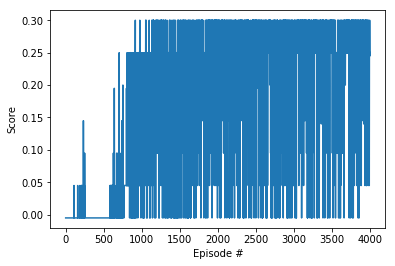

In [8]:
def ddpg(n_episodes=4000, max_t=100, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))
        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    return mean_scores #, moving_avgs


#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: 0.05
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 532

Episode 752	Average Score: -0.00
Episode 753	Average Score: -0.00
Episode 754	Average Score: 0.05
Episode 755	Average Score: 0.05
Episode 756	Average Score: -0.00
Episode 757	Average Score: -0.00
Episode 758	Average Score: -0.00
Episode 759	Average Score: -0.00
Episode 760	Average Score: -0.00
Episode 761	Average Score: -0.00
Episode 762	Average Score: -0.00
Episode 763	Average Score: -0.00
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: -0.00
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: -0.00
Episode 771	Average Score: -0.00
Episode 772	Average Score: -0.00
Episode 773	Average Score: -0.00
Episode 774	Average Score: -0.00
Episode 775	Average Score: -0.00
Episode 776	Average Score: -0.00
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 781	Average Score: -0.00
Episode 782	

Episode 1001	Average Score: -0.00
Episode 1002	Average Score: -0.00
Episode 1003	Average Score: -0.00
Episode 1004	Average Score: -0.00
Episode 1005	Average Score: -0.00
Episode 1006	Average Score: -0.00
Episode 1007	Average Score: -0.00
Episode 1008	Average Score: -0.00
Episode 1009	Average Score: -0.00
Episode 1010	Average Score: -0.00
Episode 1011	Average Score: -0.00
Episode 1012	Average Score: -0.00
Episode 1013	Average Score: -0.00
Episode 1014	Average Score: -0.00
Episode 1015	Average Score: -0.00
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: -0.00
Episode 1018	Average Score: -0.00
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: -0.00
Episode 1021	Average Score: -0.00
Episode 1022	Average Score: -0.00
Episode 1023	Average Score: -0.00
Episode 1024	Average Score: -0.00
Episode 1025	Average Score: -0.00
Episode 1026	Average Score: -0.00
Episode 1027	Average Score: -0.00
Episode 1028	Average Score: -0.00
Episode 1029	Average Score: -0.00
Episode 1030	A

Episode 1243	Average Score: 0.05
Episode 1244	Average Score: -0.00
Episode 1245	Average Score: 0.05
Episode 1246	Average Score: 0.10
Episode 1247	Average Score: -0.00
Episode 1248	Average Score: -0.00
Episode 1249	Average Score: -0.00
Episode 1250	Average Score: 0.05
Episode 1251	Average Score: -0.00
Episode 1252	Average Score: 0.05
Episode 1253	Average Score: -0.00
Episode 1254	Average Score: -0.00
Episode 1255	Average Score: 0.05
Episode 1256	Average Score: 0.15
Episode 1257	Average Score: -0.00
Episode 1258	Average Score: 0.10
Episode 1259	Average Score: -0.00
Episode 1260	Average Score: -0.00
Episode 1261	Average Score: 0.20
Episode 1262	Average Score: -0.00
Episode 1263	Average Score: 0.05
Episode 1264	Average Score: -0.00
Episode 1265	Average Score: 0.05
Episode 1266	Average Score: -0.00
Episode 1267	Average Score: -0.00
Episode 1268	Average Score: -0.00
Episode 1269	Average Score: -0.00
Episode 1270	Average Score: -0.00
Episode 1271	Average Score: -0.00
Episode 1272	Average Scor

Episode 1487	Average Score: -0.00
Episode 1488	Average Score: -0.00
Episode 1489	Average Score: -0.00
Episode 1490	Average Score: -0.00
Episode 1491	Average Score: -0.00
Episode 1492	Average Score: -0.00
Episode 1493	Average Score: -0.00
Episode 1494	Average Score: -0.00
Episode 1495	Average Score: -0.00
Episode 1496	Average Score: -0.00
Episode 1497	Average Score: -0.00
Episode 1498	Average Score: -0.00
Episode 1499	Average Score: -0.00
Episode 1500	Average Score: -0.00
Episode 1501	Average Score: -0.00
Episode 1502	Average Score: -0.00
Episode 1503	Average Score: 0.10
Episode 1504	Average Score: -0.00
Episode 1505	Average Score: 0.20
Episode 1506	Average Score: -0.00
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: -0.00
Episode 1509	Average Score: -0.00
Episode 1510	Average Score: -0.00
Episode 1511	Average Score: -0.00
Episode 1512	Average Score: -0.00
Episode 1513	Average Score: -0.00
Episode 1514	Average Score: -0.00
Episode 1515	Average Score: -0.00
Episode 1516	Ave

Episode 1733	Average Score: 0.05
Episode 1734	Average Score: 0.25
Episode 1735	Average Score: 0.05
Episode 1736	Average Score: 0.10
Episode 1737	Average Score: 0.25
Episode 1738	Average Score: 0.20
Episode 1739	Average Score: 0.20
Episode 1740	Average Score: 0.25
Episode 1741	Average Score: 0.25
Episode 1742	Average Score: 0.10
Episode 1743	Average Score: 0.10
Episode 1744	Average Score: 0.10
Episode 1745	Average Score: -0.00
Episode 1746	Average Score: 0.10
Episode 1747	Average Score: 0.20
Episode 1748	Average Score: 0.10
Episode 1749	Average Score: 0.20
Episode 1750	Average Score: 0.04
Episode 1751	Average Score: 0.05
Episode 1752	Average Score: 0.05
Episode 1753	Average Score: -0.00
Episode 1754	Average Score: 0.10
Episode 1755	Average Score: -0.00
Episode 1756	Average Score: 0.05
Episode 1757	Average Score: -0.00
Episode 1758	Average Score: -0.00
Episode 1759	Average Score: 0.10
Episode 1760	Average Score: 0.05
Episode 1761	Average Score: 0.05
Episode 1762	Average Score: 0.10
Episo

Episode 1981	Average Score: 0.25
Episode 1982	Average Score: 0.15
Episode 1983	Average Score: 0.10
Episode 1984	Average Score: 0.15
Episode 1985	Average Score: 0.05
Episode 1986	Average Score: 0.10
Episode 1987	Average Score: 0.25
Episode 1988	Average Score: -0.00
Episode 1989	Average Score: 0.25
Episode 1990	Average Score: -0.00
Episode 1991	Average Score: 0.10
Episode 1992	Average Score: 0.05
Episode 1993	Average Score: 0.05
Episode 1994	Average Score: 0.05
Episode 1995	Average Score: 0.10
Episode 1996	Average Score: 0.10
Episode 1997	Average Score: 0.25
Episode 1998	Average Score: 0.25
Episode 1999	Average Score: 0.25
Episode 2000	Average Score: 0.05
Episode 2001	Average Score: 0.10
Episode 2002	Average Score: 0.10
Episode 2003	Average Score: 0.05
Episode 2004	Average Score: 0.25
Episode 2005	Average Score: 0.25
Episode 2006	Average Score: 0.15
Episode 2007	Average Score: 0.25
Episode 2008	Average Score: 0.25
Episode 2009	Average Score: 0.05
Episode 2010	Average Score: 0.25
Episode 

Episode 2229	Average Score: 0.25
Episode 2230	Average Score: 0.25
Episode 2231	Average Score: -0.00
Episode 2232	Average Score: 0.25
Episode 2233	Average Score: 0.25
Episode 2234	Average Score: 0.25
Episode 2235	Average Score: 0.25
Episode 2236	Average Score: 0.10
Episode 2237	Average Score: 0.25
Episode 2238	Average Score: 0.15
Episode 2239	Average Score: 0.25
Episode 2240	Average Score: 0.25
Episode 2241	Average Score: 0.25
Episode 2242	Average Score: 0.25
Episode 2243	Average Score: 0.15
Episode 2244	Average Score: 0.25
Episode 2245	Average Score: 0.05
Episode 2246	Average Score: 0.25
Episode 2247	Average Score: 0.25
Episode 2248	Average Score: 0.15
Episode 2249	Average Score: 0.05
Episode 2250	Average Score: 0.05
Episode 2251	Average Score: 0.05
Episode 2252	Average Score: 0.25
Episode 2253	Average Score: 0.25
Episode 2254	Average Score: 0.25
Episode 2255	Average Score: 0.05
Episode 2256	Average Score: 0.25
Episode 2257	Average Score: 0.25
Episode 2258	Average Score: 0.20
Episode 2

Episode 2477	Average Score: 0.05
Episode 2478	Average Score: 0.25
Episode 2479	Average Score: 0.25
Episode 2480	Average Score: 0.10
Episode 2481	Average Score: 0.25
Episode 2482	Average Score: 0.25
Episode 2483	Average Score: 0.25
Episode 2484	Average Score: 0.10
Episode 2485	Average Score: 0.25
Episode 2486	Average Score: 0.25
Episode 2487	Average Score: 0.05
Episode 2488	Average Score: 0.05
Episode 2489	Average Score: 0.05
Episode 2490	Average Score: 0.25
Episode 2491	Average Score: 0.25
Episode 2492	Average Score: 0.25
Episode 2493	Average Score: 0.25
Episode 2494	Average Score: 0.30
Episode 2495	Average Score: 0.25
Episode 2496	Average Score: 0.25
Episode 2497	Average Score: 0.10
Episode 2498	Average Score: 0.25
Episode 2499	Average Score: 0.25
Episode 2500	Average Score: 0.25
Episode 2501	Average Score: 0.25
Episode 2502	Average Score: 0.05
Episode 2503	Average Score: 0.10
Episode 2504	Average Score: 0.25
Episode 2505	Average Score: 0.25
Episode 2506	Average Score: 0.05
Episode 25

Episode 2725	Average Score: 0.25
Episode 2726	Average Score: 0.05
Episode 2727	Average Score: 0.25
Episode 2728	Average Score: 0.25
Episode 2729	Average Score: 0.25
Episode 2730	Average Score: 0.25
Episode 2731	Average Score: 0.25
Episode 2732	Average Score: 0.20
Episode 2733	Average Score: 0.25
Episode 2734	Average Score: 0.25
Episode 2735	Average Score: 0.25
Episode 2736	Average Score: 0.25
Episode 2737	Average Score: 0.30
Episode 2738	Average Score: 0.25
Episode 2739	Average Score: 0.25
Episode 2740	Average Score: 0.15
Episode 2741	Average Score: 0.25
Episode 2742	Average Score: 0.25
Episode 2743	Average Score: 0.25
Episode 2744	Average Score: 0.20
Episode 2745	Average Score: 0.25
Episode 2746	Average Score: 0.25
Episode 2747	Average Score: 0.20
Episode 2748	Average Score: 0.05
Episode 2749	Average Score: 0.25
Episode 2750	Average Score: 0.25
Episode 2751	Average Score: -0.00
Episode 2752	Average Score: -0.00
Episode 2753	Average Score: 0.25
Episode 2754	Average Score: 0.25
Episode 

Episode 2973	Average Score: 0.25
Episode 2974	Average Score: 0.20
Episode 2975	Average Score: 0.05
Episode 2976	Average Score: 0.25
Episode 2977	Average Score: 0.25
Episode 2978	Average Score: 0.25
Episode 2979	Average Score: 0.25
Episode 2980	Average Score: 0.30
Episode 2981	Average Score: 0.25
Episode 2982	Average Score: -0.00
Episode 2983	Average Score: 0.25
Episode 2984	Average Score: 0.25
Episode 2985	Average Score: 0.25
Episode 2986	Average Score: 0.25
Episode 2987	Average Score: 0.30
Episode 2988	Average Score: 0.25
Episode 2989	Average Score: 0.10
Episode 2990	Average Score: 0.25
Episode 2991	Average Score: 0.25
Episode 2992	Average Score: 0.05
Episode 2993	Average Score: 0.25
Episode 2994	Average Score: 0.25
Episode 2995	Average Score: 0.25
Episode 2996	Average Score: 0.30
Episode 2997	Average Score: 0.25
Episode 2998	Average Score: 0.25
Episode 2999	Average Score: 0.25
Episode 3000	Average Score: 0.25
Episode 3001	Average Score: 0.25
Episode 3002	Average Score: 0.25
Episode 3

Episode 3221	Average Score: 0.15
Episode 3222	Average Score: 0.25
Episode 3223	Average Score: 0.25
Episode 3224	Average Score: 0.25
Episode 3225	Average Score: 0.25
Episode 3226	Average Score: 0.30
Episode 3227	Average Score: 0.25
Episode 3228	Average Score: 0.25
Episode 3229	Average Score: 0.10
Episode 3230	Average Score: 0.25
Episode 3231	Average Score: 0.25
Episode 3232	Average Score: 0.25
Episode 3233	Average Score: 0.25
Episode 3234	Average Score: 0.30
Episode 3235	Average Score: 0.25
Episode 3236	Average Score: 0.25
Episode 3237	Average Score: 0.15
Episode 3238	Average Score: 0.25
Episode 3239	Average Score: 0.25
Episode 3240	Average Score: 0.25
Episode 3241	Average Score: 0.25
Episode 3242	Average Score: 0.25
Episode 3243	Average Score: -0.01
Episode 3244	Average Score: 0.25
Episode 3245	Average Score: 0.25
Episode 3246	Average Score: 0.25
Episode 3247	Average Score: 0.25
Episode 3248	Average Score: 0.30
Episode 3249	Average Score: 0.25
Episode 3250	Average Score: 0.25
Episode 3

Episode 3470	Average Score: 0.25
Episode 3471	Average Score: 0.25
Episode 3472	Average Score: -0.00
Episode 3473	Average Score: 0.25
Episode 3474	Average Score: 0.25
Episode 3475	Average Score: 0.25
Episode 3476	Average Score: 0.10
Episode 3477	Average Score: 0.25
Episode 3478	Average Score: 0.25
Episode 3479	Average Score: 0.25
Episode 3480	Average Score: 0.25
Episode 3481	Average Score: 0.30
Episode 3482	Average Score: 0.25
Episode 3483	Average Score: 0.25
Episode 3484	Average Score: 0.25
Episode 3485	Average Score: 0.30
Episode 3486	Average Score: 0.25
Episode 3487	Average Score: 0.25
Episode 3488	Average Score: 0.30
Episode 3489	Average Score: 0.25
Episode 3490	Average Score: 0.25
Episode 3491	Average Score: 0.25
Episode 3492	Average Score: 0.05
Episode 3493	Average Score: 0.25
Episode 3494	Average Score: 0.25
Episode 3495	Average Score: 0.25
Episode 3496	Average Score: 0.15
Episode 3497	Average Score: 0.25
Episode 3498	Average Score: 0.25
Episode 3499	Average Score: 0.25
Episode 3

Episode 3719	Average Score: 0.25
Episode 3720	Average Score: 0.15
Episode 3721	Average Score: 0.25
Episode 3722	Average Score: 0.25
Episode 3723	Average Score: 0.20
Episode 3724	Average Score: 0.25
Episode 3725	Average Score: 0.25
Episode 3726	Average Score: 0.25
Episode 3727	Average Score: 0.25
Episode 3728	Average Score: 0.30
Episode 3729	Average Score: 0.25
Episode 3730	Average Score: 0.25
Episode 3731	Average Score: 0.15
Episode 3732	Average Score: 0.25
Episode 3733	Average Score: 0.25
Episode 3734	Average Score: 0.25
Episode 3735	Average Score: 0.05
Episode 3736	Average Score: 0.25
Episode 3737	Average Score: 0.25
Episode 3738	Average Score: 0.25
Episode 3739	Average Score: 0.25
Episode 3740	Average Score: 0.30
Episode 3741	Average Score: 0.25
Episode 3742	Average Score: 0.25
Episode 3743	Average Score: 0.25
Episode 3744	Average Score: 0.30
Episode 3745	Average Score: -0.00
Episode 3746	Average Score: 0.25
Episode 3747	Average Score: 0.25
Episode 3748	Average Score: 0.25
Episode 3

Episode 3968	Average Score: 0.30
Episode 3969	Average Score: 0.25
Episode 3970	Average Score: 0.25
Episode 3971	Average Score: 0.25
Episode 3972	Average Score: 0.30
Episode 3973	Average Score: 0.25
Episode 3974	Average Score: 0.15
Episode 3975	Average Score: 0.20
Episode 3976	Average Score: 0.25
Episode 3977	Average Score: 0.25
Episode 3978	Average Score: 0.15
Episode 3979	Average Score: 0.25
Episode 3980	Average Score: 0.25
Episode 3981	Average Score: 0.25
Episode 3982	Average Score: 0.25
Episode 3983	Average Score: 0.30
Episode 3984	Average Score: 0.25
Episode 3985	Average Score: 0.25
Episode 3986	Average Score: 0.25
Episode 3987	Average Score: 0.30
Episode 3988	Average Score: 0.25
Episode 3989	Average Score: 0.25
Episode 3990	Average Score: 0.25
Episode 3991	Average Score: 0.30
Episode 3992	Average Score: 0.25
Episode 3993	Average Score: 0.25
Episode 3994	Average Score: 0.25
Episode 3995	Average Score: 0.30
Episode 3996	Average Score: 0.25
Episode 3997	Average Score: 0.25
Episode 39

Episode 4217	Average Score: 0.25
Episode 4218	Average Score: 0.30
Episode 4219	Average Score: 0.25
Episode 4220	Average Score: 0.25
Episode 4221	Average Score: 0.15
Episode 4222	Average Score: 0.25
Episode 4223	Average Score: 0.25
Episode 4224	Average Score: 0.10
Episode 4225	Average Score: 0.25
Episode 4226	Average Score: 0.25
Episode 4227	Average Score: 0.25
Episode 4228	Average Score: 0.25
Episode 4229	Average Score: 0.30
Episode 4230	Average Score: 0.25
Episode 4231	Average Score: 0.25
Episode 4232	Average Score: 0.25
Episode 4233	Average Score: 0.30
Episode 4234	Average Score: 0.25
Episode 4235	Average Score: 0.25
Episode 4236	Average Score: 0.25
Episode 4237	Average Score: 0.30
Episode 4238	Average Score: 0.25
Episode 4239	Average Score: 0.25
Episode 4240	Average Score: 0.25
Episode 4241	Average Score: 0.30
Episode 4242	Average Score: 0.25
Episode 4243	Average Score: 0.25
Episode 4244	Average Score: 0.25
Episode 4245	Average Score: 0.25
Episode 4246	Average Score: 0.25
Episode 42

Episode 4466	Average Score: 0.25
Episode 4467	Average Score: 0.30
Episode 4468	Average Score: 0.25
Episode 4469	Average Score: 0.25
Episode 4470	Average Score: 0.10
Episode 4471	Average Score: 0.25
Episode 4472	Average Score: 0.25
Episode 4473	Average Score: 0.25
Episode 4474	Average Score: 0.25
Episode 4475	Average Score: 0.30
Episode 4476	Average Score: 0.25
Episode 4477	Average Score: 0.25
Episode 4478	Average Score: 0.25
Episode 4479	Average Score: 0.30
Episode 4480	Average Score: 0.25
Episode 4481	Average Score: 0.25
Episode 4482	Average Score: 0.25
Episode 4483	Average Score: 0.25
Episode 4484	Average Score: 0.25
Episode 4485	Average Score: 0.25
Episode 4486	Average Score: 0.15
Episode 4487	Average Score: 0.25
Episode 4488	Average Score: 0.25
Episode 4489	Average Score: 0.25
Episode 4490	Average Score: 0.25
Episode 4491	Average Score: 0.30
Episode 4492	Average Score: 0.25
Episode 4493	Average Score: 0.25
Episode 4494	Average Score: 0.25
Episode 4495	Average Score: 0.30
Episode 44

Episode 4715	Average Score: 0.25
Episode 4716	Average Score: 0.30
Episode 4717	Average Score: 0.25
Episode 4718	Average Score: 0.25
Episode 4719	Average Score: 0.25
Episode 4720	Average Score: 0.30
Episode 4721	Average Score: 0.25
Episode 4722	Average Score: 0.25
Episode 4723	Average Score: 0.25
Episode 4724	Average Score: 0.10
Episode 4725	Average Score: 0.25
Episode 4726	Average Score: 0.25
Episode 4727	Average Score: 0.25
Episode 4728	Average Score: 0.25
Episode 4729	Average Score: 0.30
Episode 4730	Average Score: 0.25
Episode 4731	Average Score: 0.25
Episode 4732	Average Score: 0.25
Episode 4733	Average Score: 0.30
Episode 4734	Average Score: 0.25
Episode 4735	Average Score: 0.25
Episode 4736	Average Score: 0.25
Episode 4737	Average Score: 0.30
Episode 4738	Average Score: 0.25
Episode 4739	Average Score: 0.25
Episode 4740	Average Score: 0.25
Episode 4741	Average Score: 0.25
Episode 4742	Average Score: 0.30
Episode 4743	Average Score: 0.25
Episode 4744	Average Score: 0.25
Episode 47

Episode 4964	Average Score: 0.25
Episode 4965	Average Score: -0.00
Episode 4966	Average Score: 0.25
Episode 4967	Average Score: 0.25
Episode 4968	Average Score: 0.25
Episode 4969	Average Score: 0.25
Episode 4970	Average Score: 0.30
Episode 4971	Average Score: 0.25
Episode 4972	Average Score: 0.05
Episode 4973	Average Score: 0.20
Episode 4974	Average Score: 0.25
Episode 4975	Average Score: 0.25
Episode 4976	Average Score: 0.25
Episode 4977	Average Score: 0.10
Episode 4978	Average Score: 0.25
Episode 4979	Average Score: 0.25
Episode 4980	Average Score: 0.25
Episode 4981	Average Score: 0.25
Episode 4982	Average Score: 0.30
Episode 4983	Average Score: 0.25
Episode 4984	Average Score: 0.25
Episode 4985	Average Score: 0.25
Episode 4986	Average Score: 0.30
Episode 4987	Average Score: 0.25
Episode 4988	Average Score: 0.25
Episode 4989	Average Score: 0.25
Episode 4990	Average Score: 0.30
Episode 4991	Average Score: 0.25
Episode 4992	Average Score: 0.25
Episode 4993	Average Score: 0.25
Episode 4

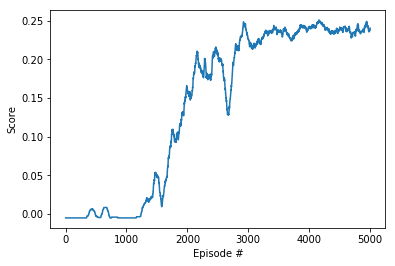

In [10]:
# n_episodes=4000
def ddpg(n_episodes=5000, max_t=100, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))
        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Running the same code after another, no closing the environment 
# sometimes the result is zero, and sometime good 

In [ ]:
#1

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 751	Average Score: -0.00
Episode 752	Average Score: -0.00
Episode 753	Average Score: -0.00
Episode 754	Average Score: -0.00
Episode 755	Average Score: -0.00
Episode 756	Average Score: -0.00
Episode 757	Average Score: -0.00
Episode 758	Average Score: -0.00
Episode 759	Average Score: -0.00
Episode 760	Average Score: -0.00
Episode 761	Average Score: -0.00
Episode 762	Average Score: -0.00
Episode 763	Average Score: -0.00
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: -0.00
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: -0.00
Episode 771	Average Score: -0.00
Episode 772	Average Score: -0.00
Episode 773	Average Score: -0.00
Episode 774	Average Score: -0.00
Episode 775	Average Score: -0.00
Episode 776	Average Score: -0.00
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 78

Episode 1000	Average Score: -0.00
Episode 1001	Average Score: -0.00
Episode 1002	Average Score: -0.00
Episode 1003	Average Score: -0.00
Episode 1004	Average Score: -0.00
Episode 1005	Average Score: -0.00
Episode 1006	Average Score: -0.00
Episode 1007	Average Score: -0.00
Episode 1008	Average Score: -0.00
Episode 1009	Average Score: -0.00
Episode 1010	Average Score: -0.00
Episode 1011	Average Score: -0.00
Episode 1012	Average Score: -0.00
Episode 1013	Average Score: -0.00
Episode 1014	Average Score: -0.00
Episode 1015	Average Score: -0.00
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: -0.00
Episode 1018	Average Score: -0.00
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: -0.00
Episode 1021	Average Score: -0.00
Episode 1022	Average Score: -0.00
Episode 1023	Average Score: -0.00
Episode 1024	Average Score: -0.00
Episode 1025	Average Score: -0.00
Episode 1026	Average Score: -0.00
Episode 1027	Average Score: -0.00
Episode 1028	Average Score: -0.00
Episode 1029	A

Episode 1241	Average Score: -0.00
Episode 1242	Average Score: -0.00
Episode 1243	Average Score: -0.00
Episode 1244	Average Score: -0.00
Episode 1245	Average Score: -0.00
Episode 1246	Average Score: -0.00
Episode 1247	Average Score: -0.00
Episode 1248	Average Score: -0.00
Episode 1249	Average Score: -0.00
Episode 1250	Average Score: -0.00
Episode 1251	Average Score: -0.00
Episode 1252	Average Score: -0.00
Episode 1253	Average Score: -0.00
Episode 1254	Average Score: -0.00
Episode 1255	Average Score: -0.00
Episode 1256	Average Score: -0.00
Episode 1257	Average Score: -0.00
Episode 1258	Average Score: -0.00
Episode 1259	Average Score: -0.00
Episode 1260	Average Score: -0.00
Episode 1261	Average Score: -0.00
Episode 1262	Average Score: -0.00
Episode 1263	Average Score: -0.00
Episode 1264	Average Score: -0.00
Episode 1265	Average Score: -0.00
Episode 1266	Average Score: -0.00
Episode 1267	Average Score: -0.00
Episode 1268	Average Score: -0.00
Episode 1269	Average Score: -0.00
Episode 1270	A

Episode 1482	Average Score: -0.00
Episode 1483	Average Score: -0.00
Episode 1484	Average Score: -0.00
Episode 1485	Average Score: -0.00
Episode 1486	Average Score: -0.00
Episode 1487	Average Score: -0.00
Episode 1488	Average Score: -0.00
Episode 1489	Average Score: -0.00
Episode 1490	Average Score: -0.00
Episode 1491	Average Score: -0.00
Episode 1492	Average Score: -0.00
Episode 1493	Average Score: -0.00
Episode 1494	Average Score: -0.00
Episode 1495	Average Score: -0.00
Episode 1496	Average Score: -0.00
Episode 1497	Average Score: -0.00
Episode 1498	Average Score: -0.00
Episode 1499	Average Score: -0.00
Episode 1500	Average Score: -0.00
Episode 1501	Average Score: -0.00
Episode 1502	Average Score: -0.00
Episode 1503	Average Score: -0.00
Episode 1504	Average Score: -0.00
Episode 1505	Average Score: -0.00
Episode 1506	Average Score: -0.00
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: -0.00
Episode 1509	Average Score: -0.00
Episode 1510	Average Score: -0.00
Episode 1511	A

Episode 1723	Average Score: -0.00
Episode 1724	Average Score: -0.00
Episode 1725	Average Score: -0.00
Episode 1726	Average Score: -0.00
Episode 1727	Average Score: -0.00
Episode 1728	Average Score: -0.00
Episode 1729	Average Score: -0.00
Episode 1730	Average Score: -0.00
Episode 1731	Average Score: -0.00
Episode 1732	Average Score: -0.00
Episode 1733	Average Score: -0.00
Episode 1734	Average Score: -0.00
Episode 1735	Average Score: -0.00
Episode 1736	Average Score: -0.00
Episode 1737	Average Score: -0.00
Episode 1738	Average Score: -0.00
Episode 1739	Average Score: -0.00
Episode 1740	Average Score: -0.00
Episode 1741	Average Score: -0.00
Episode 1742	Average Score: -0.00
Episode 1743	Average Score: -0.00
Episode 1744	Average Score: -0.00
Episode 1745	Average Score: -0.00
Episode 1746	Average Score: -0.00
Episode 1747	Average Score: -0.00
Episode 1748	Average Score: -0.00
Episode 1749	Average Score: -0.00
Episode 1750	Average Score: -0.00
Episode 1751	Average Score: -0.00
Episode 1752	A

Episode 1964	Average Score: -0.00
Episode 1965	Average Score: -0.00
Episode 1966	Average Score: -0.00
Episode 1967	Average Score: -0.00
Episode 1968	Average Score: -0.00
Episode 1969	Average Score: -0.00
Episode 1970	Average Score: -0.00
Episode 1971	Average Score: -0.00
Episode 1972	Average Score: -0.00
Episode 1973	Average Score: -0.00
Episode 1974	Average Score: -0.00
Episode 1975	Average Score: -0.00
Episode 1976	Average Score: -0.00
Episode 1977	Average Score: -0.00
Episode 1978	Average Score: -0.00
Episode 1979	Average Score: -0.00
Episode 1980	Average Score: -0.00
Episode 1981	Average Score: -0.00
Episode 1982	Average Score: -0.00
Episode 1983	Average Score: -0.00
Episode 1984	Average Score: -0.00
Episode 1985	Average Score: -0.00
Episode 1986	Average Score: -0.00
Episode 1987	Average Score: -0.00
Episode 1988	Average Score: -0.00
Episode 1989	Average Score: -0.00
Episode 1990	Average Score: -0.00
Episode 1991	Average Score: -0.00
Episode 1992	Average Score: -0.00
Episode 1993	A

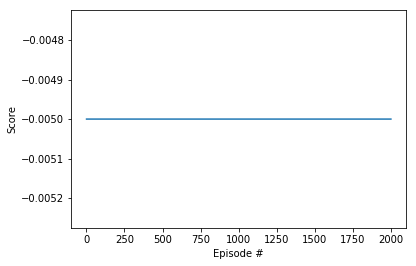

In [6]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=2000, max_t=1000, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))

#        moving_avgs.append(np.mean(scores_window))

        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs_256-128.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs_256-128.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#2

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.01
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 751	Average Score: -0.00
Episode 752	Average Score: -0.00
Episode 753	Average Score: -0.00
Episode 754	Average Score: -0.00
Episode 755	Average Score: -0.00
Episode 756	Average Score: -0.00
Episode 757	Average Score: -0.00
Episode 758	Average Score: -0.00
Episode 759	Average Score: -0.00
Episode 760	Average Score: -0.00
Episode 761	Average Score: -0.00
Episode 762	Average Score: -0.00
Episode 763	Average Score: -0.00
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: -0.00
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: -0.00
Episode 771	Average Score: -0.00
Episode 772	Average Score: -0.00
Episode 773	Average Score: -0.00
Episode 774	Average Score: -0.00
Episode 775	Average Score: -0.00
Episode 776	Average Score: -0.00
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 78

Episode 1000	Average Score: -0.00
Episode 1001	Average Score: -0.00
Episode 1002	Average Score: -0.00
Episode 1003	Average Score: -0.00
Episode 1004	Average Score: -0.00
Episode 1005	Average Score: -0.00
Episode 1006	Average Score: -0.00
Episode 1007	Average Score: -0.00
Episode 1008	Average Score: -0.00
Episode 1009	Average Score: -0.00
Episode 1010	Average Score: -0.00
Episode 1011	Average Score: -0.00
Episode 1012	Average Score: -0.00
Episode 1013	Average Score: -0.00
Episode 1014	Average Score: -0.00
Episode 1015	Average Score: -0.00
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: -0.00
Episode 1018	Average Score: -0.00
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: -0.00
Episode 1021	Average Score: -0.00
Episode 1022	Average Score: -0.00
Episode 1023	Average Score: -0.00
Episode 1024	Average Score: -0.00
Episode 1025	Average Score: -0.00
Episode 1026	Average Score: -0.00
Episode 1027	Average Score: 0.05
Episode 1028	Average Score: -0.00
Episode 1029	Av

Episode 1242	Average Score: -0.00
Episode 1243	Average Score: -0.00
Episode 1244	Average Score: -0.00
Episode 1245	Average Score: -0.00
Episode 1246	Average Score: -0.00
Episode 1247	Average Score: -0.00
Episode 1248	Average Score: -0.00
Episode 1249	Average Score: -0.00
Episode 1250	Average Score: -0.00
Episode 1251	Average Score: -0.00
Episode 1252	Average Score: -0.00
Episode 1253	Average Score: -0.00
Episode 1254	Average Score: -0.00
Episode 1255	Average Score: -0.00
Episode 1256	Average Score: -0.00
Episode 1257	Average Score: -0.00
Episode 1258	Average Score: -0.00
Episode 1259	Average Score: -0.00
Episode 1260	Average Score: -0.00
Episode 1261	Average Score: -0.00
Episode 1262	Average Score: -0.00
Episode 1263	Average Score: 0.10
Episode 1264	Average Score: -0.00
Episode 1265	Average Score: -0.00
Episode 1266	Average Score: -0.00
Episode 1267	Average Score: -0.00
Episode 1268	Average Score: -0.00
Episode 1269	Average Score: -0.00
Episode 1270	Average Score: 0.05
Episode 1271	Ave

Episode 1485	Average Score: 0.05
Episode 1486	Average Score: 0.05
Episode 1487	Average Score: -0.00
Episode 1488	Average Score: -0.00
Episode 1489	Average Score: 0.05
Episode 1490	Average Score: -0.00
Episode 1491	Average Score: -0.00
Episode 1492	Average Score: -0.00
Episode 1493	Average Score: -0.00
Episode 1494	Average Score: -0.00
Episode 1495	Average Score: -0.00
Episode 1496	Average Score: -0.00
Episode 1497	Average Score: -0.00
Episode 1498	Average Score: -0.00
Episode 1499	Average Score: 0.05
Episode 1500	Average Score: -0.00
Episode 1501	Average Score: -0.00
Episode 1502	Average Score: 0.05
Episode 1503	Average Score: -0.00
Episode 1504	Average Score: -0.00
Episode 1505	Average Score: -0.00
Episode 1506	Average Score: 0.05
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: -0.00
Episode 1509	Average Score: 0.05
Episode 1510	Average Score: -0.00
Episode 1511	Average Score: -0.00
Episode 1512	Average Score: -0.00
Episode 1513	Average Score: -0.00
Episode 1514	Average 

Episode 1728	Average Score: 0.05
Episode 1729	Average Score: -0.00
Episode 1730	Average Score: 0.20
Episode 1731	Average Score: 0.05
Episode 1732	Average Score: 0.10
Episode 1733	Average Score: 0.10
Episode 1734	Average Score: -0.00
Episode 1735	Average Score: 0.15
Episode 1736	Average Score: -0.00
Episode 1737	Average Score: 0.04
Episode 1738	Average Score: 0.05
Episode 1739	Average Score: 0.05
Episode 1740	Average Score: 0.05
Episode 1741	Average Score: -0.00
Episode 1742	Average Score: 0.05
Episode 1743	Average Score: -0.00
Episode 1744	Average Score: -0.00
Episode 1745	Average Score: 0.05
Episode 1746	Average Score: -0.00
Episode 1747	Average Score: -0.00
Episode 1748	Average Score: 0.10
Episode 1749	Average Score: 0.05
Episode 1750	Average Score: 0.05
Episode 1751	Average Score: 0.10
Episode 1752	Average Score: -0.00
Episode 1753	Average Score: -0.00
Episode 1754	Average Score: -0.00
Episode 1755	Average Score: -0.00
Episode 1756	Average Score: 0.10
Episode 1757	Average Score: 0.1

Episode 1974	Average Score: 0.05
Episode 1975	Average Score: -0.00
Episode 1976	Average Score: 0.05
Episode 1977	Average Score: 0.10
Episode 1978	Average Score: -0.00
Episode 1979	Average Score: 0.05
Episode 1980	Average Score: 0.05
Episode 1981	Average Score: 0.30
Episode 1982	Average Score: 0.10
Episode 1983	Average Score: 0.05
Episode 1984	Average Score: 0.05
Episode 1985	Average Score: 0.05
Episode 1986	Average Score: 0.20
Episode 1987	Average Score: 0.05
Episode 1988	Average Score: 0.10
Episode 1989	Average Score: 0.05
Episode 1990	Average Score: 0.05
Episode 1991	Average Score: 0.05
Episode 1992	Average Score: 0.05
Episode 1993	Average Score: 0.05
Episode 1994	Average Score: 0.10
Episode 1995	Average Score: 0.05
Episode 1996	Average Score: 0.05
Episode 1997	Average Score: -0.00
Episode 1998	Average Score: 0.15
Episode 1999	Average Score: -0.00
Episode 2000	Average Score: 0.05


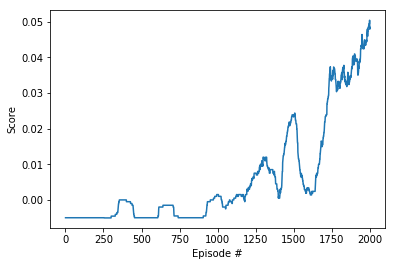

In [7]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=2000, max_t=1000, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))

#        moving_avgs.append(np.mean(scores_window))

        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs_256-128.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs_256-128.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#3

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 751	Average Score: -0.00
Episode 752	Average Score: -0.00
Episode 753	Average Score: -0.00
Episode 754	Average Score: -0.00
Episode 755	Average Score: -0.00
Episode 756	Average Score: -0.00
Episode 757	Average Score: -0.00
Episode 758	Average Score: -0.00
Episode 759	Average Score: -0.00
Episode 760	Average Score: -0.00
Episode 761	Average Score: -0.00
Episode 762	Average Score: -0.00
Episode 763	Average Score: -0.00
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: -0.00
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: -0.00
Episode 771	Average Score: -0.00
Episode 772	Average Score: -0.00
Episode 773	Average Score: -0.00
Episode 774	Average Score: -0.00
Episode 775	Average Score: -0.00
Episode 776	Average Score: -0.00
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 78

Episode 1000	Average Score: -0.00
Episode 1001	Average Score: -0.00
Episode 1002	Average Score: -0.00
Episode 1003	Average Score: -0.00
Episode 1004	Average Score: -0.00
Episode 1005	Average Score: -0.00
Episode 1006	Average Score: -0.00
Episode 1007	Average Score: -0.00
Episode 1008	Average Score: -0.00
Episode 1009	Average Score: -0.00
Episode 1010	Average Score: -0.00
Episode 1011	Average Score: -0.00
Episode 1012	Average Score: -0.00
Episode 1013	Average Score: -0.00
Episode 1014	Average Score: -0.00
Episode 1015	Average Score: -0.00
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: -0.00
Episode 1018	Average Score: -0.00
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: -0.00
Episode 1021	Average Score: -0.00
Episode 1022	Average Score: -0.00
Episode 1023	Average Score: -0.00
Episode 1024	Average Score: -0.00
Episode 1025	Average Score: -0.00
Episode 1026	Average Score: -0.00
Episode 1027	Average Score: -0.00
Episode 1028	Average Score: -0.00
Episode 1029	A

Episode 1241	Average Score: -0.00
Episode 1242	Average Score: -0.00
Episode 1243	Average Score: -0.00
Episode 1244	Average Score: -0.00
Episode 1245	Average Score: -0.00
Episode 1246	Average Score: -0.00
Episode 1247	Average Score: -0.00
Episode 1248	Average Score: -0.00
Episode 1249	Average Score: -0.00
Episode 1250	Average Score: -0.00
Episode 1251	Average Score: -0.00
Episode 1252	Average Score: -0.00
Episode 1253	Average Score: -0.00
Episode 1254	Average Score: -0.00
Episode 1255	Average Score: -0.00
Episode 1256	Average Score: -0.00
Episode 1257	Average Score: -0.00
Episode 1258	Average Score: -0.00
Episode 1259	Average Score: -0.00
Episode 1260	Average Score: -0.00
Episode 1261	Average Score: -0.00
Episode 1262	Average Score: -0.00
Episode 1263	Average Score: -0.00
Episode 1264	Average Score: -0.00
Episode 1265	Average Score: -0.00
Episode 1266	Average Score: -0.00
Episode 1267	Average Score: -0.00
Episode 1268	Average Score: -0.00
Episode 1269	Average Score: -0.00
Episode 1270	A

Episode 1482	Average Score: -0.00
Episode 1483	Average Score: -0.00
Episode 1484	Average Score: -0.00
Episode 1485	Average Score: -0.00
Episode 1486	Average Score: -0.00
Episode 1487	Average Score: -0.00
Episode 1488	Average Score: -0.00
Episode 1489	Average Score: -0.00
Episode 1490	Average Score: -0.00
Episode 1491	Average Score: -0.00
Episode 1492	Average Score: -0.00
Episode 1493	Average Score: -0.00
Episode 1494	Average Score: -0.00
Episode 1495	Average Score: -0.00
Episode 1496	Average Score: -0.00
Episode 1497	Average Score: -0.00
Episode 1498	Average Score: -0.00
Episode 1499	Average Score: -0.00
Episode 1500	Average Score: -0.00
Episode 1501	Average Score: -0.00
Episode 1502	Average Score: -0.00
Episode 1503	Average Score: -0.00
Episode 1504	Average Score: -0.00
Episode 1505	Average Score: -0.00
Episode 1506	Average Score: -0.00
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: -0.00
Episode 1509	Average Score: -0.00
Episode 1510	Average Score: -0.00
Episode 1511	A

Episode 1723	Average Score: -0.00
Episode 1724	Average Score: -0.00
Episode 1725	Average Score: -0.00
Episode 1726	Average Score: -0.00
Episode 1727	Average Score: -0.00
Episode 1728	Average Score: -0.00
Episode 1729	Average Score: -0.00
Episode 1730	Average Score: -0.00
Episode 1731	Average Score: -0.00
Episode 1732	Average Score: -0.00
Episode 1733	Average Score: -0.00
Episode 1734	Average Score: -0.00
Episode 1735	Average Score: -0.00
Episode 1736	Average Score: -0.00
Episode 1737	Average Score: -0.00
Episode 1738	Average Score: -0.00
Episode 1739	Average Score: -0.00
Episode 1740	Average Score: -0.00
Episode 1741	Average Score: -0.00
Episode 1742	Average Score: -0.00
Episode 1743	Average Score: -0.00
Episode 1744	Average Score: -0.00
Episode 1745	Average Score: -0.00
Episode 1746	Average Score: -0.00
Episode 1747	Average Score: -0.00
Episode 1748	Average Score: -0.00
Episode 1749	Average Score: -0.00
Episode 1750	Average Score: -0.00
Episode 1751	Average Score: -0.00
Episode 1752	A

Episode 1964	Average Score: -0.00
Episode 1965	Average Score: -0.00
Episode 1966	Average Score: -0.00
Episode 1967	Average Score: -0.00
Episode 1968	Average Score: -0.00
Episode 1969	Average Score: -0.00
Episode 1970	Average Score: -0.00
Episode 1971	Average Score: -0.00
Episode 1972	Average Score: -0.00
Episode 1973	Average Score: -0.00
Episode 1974	Average Score: -0.00
Episode 1975	Average Score: -0.00
Episode 1976	Average Score: -0.00
Episode 1977	Average Score: -0.00
Episode 1978	Average Score: -0.00
Episode 1979	Average Score: -0.00
Episode 1980	Average Score: -0.00
Episode 1981	Average Score: -0.00
Episode 1982	Average Score: -0.00
Episode 1983	Average Score: -0.00
Episode 1984	Average Score: -0.00
Episode 1985	Average Score: -0.00
Episode 1986	Average Score: -0.00
Episode 1987	Average Score: -0.00
Episode 1988	Average Score: -0.00
Episode 1989	Average Score: -0.00
Episode 1990	Average Score: -0.00
Episode 1991	Average Score: -0.00
Episode 1992	Average Score: -0.00
Episode 1993	A

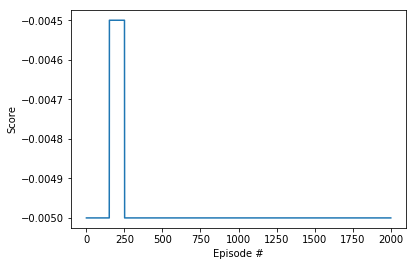

In [8]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=2000, max_t=1000, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))

#        moving_avgs.append(np.mean(scores_window))

        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs_256-128.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs_256-128.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#4

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: 0.05
Episode 277	Average Score: -0.00
Episode 278	Average Score: 0.05
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 283	

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 752	Average Score: 0.05
Episode 753	Average Score: -0.00
Episode 754	Average Score: 0.10
Episode 755	Average Score: 0.05
Episode 756	Average Score: 0.05
Episode 757	Average Score: -0.00
Episode 758	Average Score: 0.05
Episode 759	Average Score: 0.05
Episode 760	Average Score: 0.15
Episode 761	Average Score: 0.05
Episode 762	Average Score: -0.00
Episode 763	Average Score: 0.05
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: 0.05
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: 0.15
Episode 771	Average Score: 0.05
Episode 772	Average Score: -0.00
Episode 773	Average Score: 0.05
Episode 774	Average Score: 0.05
Episode 775	Average Score: -0.00
Episode 776	Average Score: 0.20
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 781	Average Score: -0.00
Episode 782	Average Score

Episode 1005	Average Score: 0.05
Episode 1006	Average Score: 0.05
Episode 1007	Average Score: 0.05
Episode 1008	Average Score: 0.20
Episode 1009	Average Score: 0.40
Episode 1010	Average Score: 1.10
Episode 1011	Average Score: 0.30
Episode 1012	Average Score: 0.20
Episode 1013	Average Score: 0.15
Episode 1014	Average Score: 0.05
Episode 1015	Average Score: 0.05
Episode 1016	Average Score: 2.60
Episode 1017	Average Score: 0.15
Episode 1018	Average Score: 0.05
Episode 1019	Average Score: 0.20
Episode 1020	Average Score: 0.15
Episode 1021	Average Score: 0.05
Episode 1022	Average Score: 1.75
Episode 1023	Average Score: 0.15
Episode 1024	Average Score: 0.05
Episode 1025	Average Score: 0.15
Episode 1026	Average Score: 0.05
Episode 1027	Average Score: 0.05
Episode 1028	Average Score: 0.05
Episode 1029	Average Score: 0.15
Episode 1030	Average Score: 0.20
Episode 1031	Average Score: 0.05
Episode 1032	Average Score: 0.05
Episode 1033	Average Score: 2.60
Episode 1034	Average Score: 2.60
Episode 10

Episode 1145	Average Score: 0.05

Environment solved in 1045 episodes!
Episode 1146	Average Score: 0.05

Environment solved in 1046 episodes!
Episode 1147	Average Score: 2.55

Environment solved in 1047 episodes!
Episode 1148	Average Score: 0.05

Environment solved in 1048 episodes!
Episode 1149	Average Score: 0.10

Environment solved in 1049 episodes!
Episode 1150	Average Score: 2.60

Environment solved in 1050 episodes!
Episode 1151	Average Score: 0.69

Environment solved in 1051 episodes!
Episode 1152	Average Score: 0.05

Environment solved in 1052 episodes!
Episode 1153	Average Score: 0.15

Environment solved in 1053 episodes!
Episode 1154	Average Score: 0.05

Environment solved in 1054 episodes!
Episode 1155	Average Score: 0.05

Environment solved in 1055 episodes!
Episode 1156	Average Score: 0.05

Environment solved in 1056 episodes!
Episode 1157	Average Score: 0.05

Environment solved in 1057 episodes!
Episode 1158	Average Score: 0.25

Environment solved in 1058 episodes!
Episod

Episode 1261	Average Score: 0.05

Environment solved in 1161 episodes!
Episode 1262	Average Score: 0.10

Environment solved in 1162 episodes!
Episode 1263	Average Score: 0.15

Environment solved in 1163 episodes!
Episode 1264	Average Score: 0.15

Environment solved in 1164 episodes!
Episode 1265	Average Score: 2.60

Environment solved in 1165 episodes!
Episode 1266	Average Score: 2.60

Environment solved in 1166 episodes!
Episode 1267	Average Score: 0.20

Environment solved in 1167 episodes!
Episode 1268	Average Score: 0.05

Environment solved in 1168 episodes!
Episode 1269	Average Score: 1.25

Environment solved in 1169 episodes!
Episode 1270	Average Score: 2.60

Environment solved in 1170 episodes!
Episode 1271	Average Score: -0.00

Environment solved in 1171 episodes!
Episode 1272	Average Score: 1.00

Environment solved in 1172 episodes!
Episode 1273	Average Score: 0.05

Environment solved in 1173 episodes!
Episode 1274	Average Score: 2.60

Environment solved in 1174 episodes!
Episo

Episode 1395	Average Score: 2.60

Environment solved in 1295 episodes!
Episode 1396	Average Score: -0.00

Environment solved in 1296 episodes!
Episode 1397	Average Score: 2.60

Environment solved in 1297 episodes!
Episode 1398	Average Score: 1.20

Environment solved in 1298 episodes!
Episode 1399	Average Score: 0.05

Environment solved in 1299 episodes!
Episode 1400	Average Score: 0.15

Environment solved in 1300 episodes!
Episode 1401	Average Score: 2.60

Environment solved in 1301 episodes!
Episode 1402	Average Score: -0.00

Environment solved in 1302 episodes!
Episode 1403	Average Score: 0.15

Environment solved in 1303 episodes!
Episode 1404	Average Score: 0.15

Environment solved in 1304 episodes!
Episode 1405	Average Score: 1.30

Environment solved in 1305 episodes!
Episode 1406	Average Score: 2.60

Environment solved in 1306 episodes!
Episode 1407	Average Score: 0.05

Environment solved in 1307 episodes!
Episode 1408	Average Score: 2.60

Environment solved in 1308 episodes!
Epis

Episode 1511	Average Score: 2.60

Environment solved in 1411 episodes!
Episode 1512	Average Score: 2.60

Environment solved in 1412 episodes!
Episode 1513	Average Score: 0.05

Environment solved in 1413 episodes!
Episode 1514	Average Score: 2.60

Environment solved in 1414 episodes!
Episode 1515	Average Score: 2.60

Environment solved in 1415 episodes!
Episode 1516	Average Score: 0.05

Environment solved in 1416 episodes!
Episode 1517	Average Score: 2.60

Environment solved in 1417 episodes!
Episode 1518	Average Score: 2.60

Environment solved in 1418 episodes!
Episode 1519	Average Score: 0.10

Environment solved in 1419 episodes!
Episode 1520	Average Score: 0.05

Environment solved in 1420 episodes!
Episode 1521	Average Score: 0.05

Environment solved in 1421 episodes!
Episode 1522	Average Score: 2.60

Environment solved in 1422 episodes!
Episode 1523	Average Score: 2.60

Environment solved in 1423 episodes!
Episode 1524	Average Score: 2.65

Environment solved in 1424 episodes!
Episod

Episode 1627	Average Score: 0.30

Environment solved in 1527 episodes!
Episode 1628	Average Score: 0.05

Environment solved in 1528 episodes!
Episode 1629	Average Score: 0.05

Environment solved in 1529 episodes!
Episode 1630	Average Score: 0.05

Environment solved in 1530 episodes!
Episode 1631	Average Score: 2.60

Environment solved in 1531 episodes!
Episode 1632	Average Score: 2.60

Environment solved in 1532 episodes!
Episode 1633	Average Score: 0.10

Environment solved in 1533 episodes!
Episode 1634	Average Score: 0.05

Environment solved in 1534 episodes!
Episode 1635	Average Score: 0.30

Environment solved in 1535 episodes!
Episode 1636	Average Score: 2.60

Environment solved in 1536 episodes!
Episode 1637	Average Score: 2.60

Environment solved in 1537 episodes!
Episode 1638	Average Score: 0.05

Environment solved in 1538 episodes!
Episode 1639	Average Score: 2.60

Environment solved in 1539 episodes!
Episode 1640	Average Score: 1.30

Environment solved in 1540 episodes!
Episod

Episode 1743	Average Score: 2.60

Environment solved in 1643 episodes!
Episode 1744	Average Score: 2.60

Environment solved in 1644 episodes!
Episode 1745	Average Score: 0.05

Environment solved in 1645 episodes!
Episode 1746	Average Score: 2.60

Environment solved in 1646 episodes!
Episode 1747	Average Score: 2.60

Environment solved in 1647 episodes!
Episode 1748	Average Score: 0.05

Environment solved in 1648 episodes!
Episode 1749	Average Score: 0.10

Environment solved in 1649 episodes!
Episode 1750	Average Score: 0.10

Environment solved in 1650 episodes!
Episode 1751	Average Score: 0.10

Environment solved in 1651 episodes!
Episode 1752	Average Score: 0.10

Environment solved in 1652 episodes!
Episode 1753	Average Score: 0.10

Environment solved in 1653 episodes!
Episode 1754	Average Score: 0.05

Environment solved in 1654 episodes!
Episode 1755	Average Score: 0.10

Environment solved in 1655 episodes!
Episode 1756	Average Score: 0.10

Environment solved in 1656 episodes!
Episod

Episode 1869	Average Score: 0.05

Environment solved in 1769 episodes!
Episode 1870	Average Score: 0.05

Environment solved in 1770 episodes!
Episode 1871	Average Score: 0.10

Environment solved in 1771 episodes!
Episode 1872	Average Score: 0.10

Environment solved in 1772 episodes!
Episode 1873	Average Score: 0.10

Environment solved in 1773 episodes!
Episode 1874	Average Score: -0.00

Environment solved in 1774 episodes!
Episode 1875	Average Score: 0.05

Environment solved in 1775 episodes!
Episode 1876	Average Score: 0.05

Environment solved in 1776 episodes!
Episode 1877	Average Score: 0.05

Environment solved in 1777 episodes!
Episode 1878	Average Score: 0.05

Environment solved in 1778 episodes!
Episode 1879	Average Score: 0.05

Environment solved in 1779 episodes!
Episode 1880	Average Score: 0.10

Environment solved in 1780 episodes!
Episode 1881	Average Score: 0.10

Environment solved in 1781 episodes!
Episode 1882	Average Score: 0.05

Environment solved in 1782 episodes!
Episo

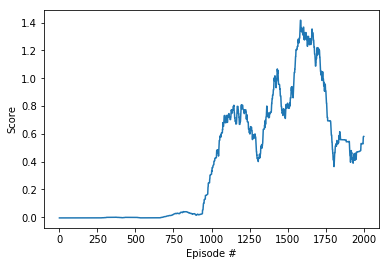

In [9]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=2000, max_t=1000, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))

#        moving_avgs.append(np.mean(scores_window))

        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs_256-128.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs_256-128.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
#5

Episode 1	Average Score: -0.00
Episode 2	Average Score: -0.00
Episode 3	Average Score: -0.00
Episode 4	Average Score: -0.00
Episode 5	Average Score: -0.00
Episode 6	Average Score: -0.00
Episode 7	Average Score: -0.00
Episode 8	Average Score: -0.00
Episode 9	Average Score: -0.00
Episode 10	Average Score: -0.00
Episode 11	Average Score: -0.00
Episode 12	Average Score: -0.00
Episode 13	Average Score: -0.00
Episode 14	Average Score: -0.00
Episode 15	Average Score: -0.00
Episode 16	Average Score: -0.00
Episode 17	Average Score: -0.00
Episode 18	Average Score: -0.00
Episode 19	Average Score: -0.00
Episode 20	Average Score: -0.00
Episode 21	Average Score: -0.00
Episode 22	Average Score: -0.00
Episode 23	Average Score: -0.00
Episode 24	Average Score: -0.00
Episode 25	Average Score: -0.00
Episode 26	Average Score: -0.00
Episode 27	Average Score: -0.00
Episode 28	Average Score: -0.00
Episode 29	Average Score: -0.00
Episode 30	Average Score: -0.00
Episode 31	Average Score: -0.00
Episode 32	Averag

Episode 253	Average Score: -0.00
Episode 254	Average Score: -0.00
Episode 255	Average Score: -0.00
Episode 256	Average Score: -0.00
Episode 257	Average Score: -0.00
Episode 258	Average Score: -0.00
Episode 259	Average Score: -0.00
Episode 260	Average Score: -0.00
Episode 261	Average Score: -0.00
Episode 262	Average Score: -0.00
Episode 263	Average Score: -0.00
Episode 264	Average Score: -0.00
Episode 265	Average Score: -0.00
Episode 266	Average Score: -0.00
Episode 267	Average Score: -0.00
Episode 268	Average Score: -0.00
Episode 269	Average Score: -0.00
Episode 270	Average Score: -0.00
Episode 271	Average Score: -0.00
Episode 272	Average Score: -0.00
Episode 273	Average Score: -0.00
Episode 274	Average Score: -0.00
Episode 275	Average Score: -0.00
Episode 276	Average Score: -0.00
Episode 277	Average Score: -0.00
Episode 278	Average Score: -0.00
Episode 279	Average Score: -0.00
Episode 280	Average Score: -0.00
Episode 281	Average Score: -0.00
Episode 282	Average Score: -0.00
Episode 28

Episode 502	Average Score: -0.00
Episode 503	Average Score: -0.00
Episode 504	Average Score: -0.00
Episode 505	Average Score: -0.00
Episode 506	Average Score: -0.00
Episode 507	Average Score: -0.00
Episode 508	Average Score: -0.00
Episode 509	Average Score: -0.00
Episode 510	Average Score: -0.00
Episode 511	Average Score: -0.00
Episode 512	Average Score: -0.00
Episode 513	Average Score: -0.00
Episode 514	Average Score: -0.00
Episode 515	Average Score: -0.00
Episode 516	Average Score: -0.00
Episode 517	Average Score: -0.00
Episode 518	Average Score: -0.00
Episode 519	Average Score: -0.00
Episode 520	Average Score: -0.00
Episode 521	Average Score: -0.00
Episode 522	Average Score: -0.00
Episode 523	Average Score: -0.00
Episode 524	Average Score: -0.00
Episode 525	Average Score: -0.00
Episode 526	Average Score: -0.00
Episode 527	Average Score: -0.00
Episode 528	Average Score: -0.00
Episode 529	Average Score: -0.00
Episode 530	Average Score: -0.00
Episode 531	Average Score: -0.00
Episode 53

Episode 751	Average Score: -0.00
Episode 752	Average Score: -0.00
Episode 753	Average Score: -0.00
Episode 754	Average Score: -0.00
Episode 755	Average Score: -0.00
Episode 756	Average Score: -0.00
Episode 757	Average Score: -0.00
Episode 758	Average Score: -0.00
Episode 759	Average Score: -0.00
Episode 760	Average Score: -0.00
Episode 761	Average Score: -0.00
Episode 762	Average Score: -0.00
Episode 763	Average Score: -0.00
Episode 764	Average Score: -0.00
Episode 765	Average Score: -0.00
Episode 766	Average Score: -0.00
Episode 767	Average Score: -0.00
Episode 768	Average Score: -0.00
Episode 769	Average Score: -0.00
Episode 770	Average Score: -0.00
Episode 771	Average Score: -0.00
Episode 772	Average Score: -0.00
Episode 773	Average Score: -0.00
Episode 774	Average Score: -0.00
Episode 775	Average Score: -0.00
Episode 776	Average Score: -0.00
Episode 777	Average Score: -0.00
Episode 778	Average Score: -0.00
Episode 779	Average Score: -0.00
Episode 780	Average Score: -0.00
Episode 78

Episode 1000	Average Score: -0.00
Episode 1001	Average Score: -0.00
Episode 1002	Average Score: -0.00
Episode 1003	Average Score: -0.00
Episode 1004	Average Score: -0.00
Episode 1005	Average Score: -0.00
Episode 1006	Average Score: -0.00
Episode 1007	Average Score: -0.00
Episode 1008	Average Score: -0.00
Episode 1009	Average Score: -0.00
Episode 1010	Average Score: -0.00
Episode 1011	Average Score: -0.00
Episode 1012	Average Score: -0.00
Episode 1013	Average Score: -0.00
Episode 1014	Average Score: -0.00
Episode 1015	Average Score: -0.00
Episode 1016	Average Score: -0.00
Episode 1017	Average Score: -0.00
Episode 1018	Average Score: -0.00
Episode 1019	Average Score: -0.00
Episode 1020	Average Score: -0.00
Episode 1021	Average Score: -0.00
Episode 1022	Average Score: -0.00
Episode 1023	Average Score: -0.00
Episode 1024	Average Score: -0.00
Episode 1025	Average Score: -0.00
Episode 1026	Average Score: -0.00
Episode 1027	Average Score: -0.00
Episode 1028	Average Score: -0.00
Episode 1029	A

Episode 1241	Average Score: -0.00
Episode 1242	Average Score: -0.00
Episode 1243	Average Score: -0.00
Episode 1244	Average Score: -0.00
Episode 1245	Average Score: -0.00
Episode 1246	Average Score: -0.00
Episode 1247	Average Score: -0.00
Episode 1248	Average Score: -0.00
Episode 1249	Average Score: -0.00
Episode 1250	Average Score: -0.00
Episode 1251	Average Score: -0.00
Episode 1252	Average Score: -0.00
Episode 1253	Average Score: -0.00
Episode 1254	Average Score: -0.00
Episode 1255	Average Score: -0.00
Episode 1256	Average Score: -0.00
Episode 1257	Average Score: -0.00
Episode 1258	Average Score: -0.00
Episode 1259	Average Score: -0.00
Episode 1260	Average Score: -0.00
Episode 1261	Average Score: -0.00
Episode 1262	Average Score: -0.00
Episode 1263	Average Score: -0.00
Episode 1264	Average Score: -0.00
Episode 1265	Average Score: -0.00
Episode 1266	Average Score: -0.00
Episode 1267	Average Score: -0.00
Episode 1268	Average Score: -0.00
Episode 1269	Average Score: -0.00
Episode 1270	A

Episode 1482	Average Score: -0.00
Episode 1483	Average Score: -0.00
Episode 1484	Average Score: -0.00
Episode 1485	Average Score: -0.00
Episode 1486	Average Score: -0.00
Episode 1487	Average Score: -0.00
Episode 1488	Average Score: -0.00
Episode 1489	Average Score: -0.00
Episode 1490	Average Score: -0.00
Episode 1491	Average Score: -0.00
Episode 1492	Average Score: -0.00
Episode 1493	Average Score: -0.00
Episode 1494	Average Score: -0.00
Episode 1495	Average Score: -0.00
Episode 1496	Average Score: -0.00
Episode 1497	Average Score: -0.00
Episode 1498	Average Score: -0.00
Episode 1499	Average Score: -0.00
Episode 1500	Average Score: -0.00
Episode 1501	Average Score: -0.00
Episode 1502	Average Score: -0.00
Episode 1503	Average Score: -0.00
Episode 1504	Average Score: -0.00
Episode 1505	Average Score: -0.00
Episode 1506	Average Score: -0.00
Episode 1507	Average Score: -0.00
Episode 1508	Average Score: -0.00
Episode 1509	Average Score: -0.00
Episode 1510	Average Score: -0.00
Episode 1511	A

Episode 1723	Average Score: -0.00
Episode 1724	Average Score: -0.00
Episode 1725	Average Score: -0.00
Episode 1726	Average Score: -0.00
Episode 1727	Average Score: -0.00
Episode 1728	Average Score: -0.00
Episode 1729	Average Score: -0.00
Episode 1730	Average Score: -0.00
Episode 1731	Average Score: -0.00
Episode 1732	Average Score: -0.00
Episode 1733	Average Score: -0.00
Episode 1734	Average Score: -0.00
Episode 1735	Average Score: -0.00
Episode 1736	Average Score: -0.00
Episode 1737	Average Score: -0.00
Episode 1738	Average Score: -0.00
Episode 1739	Average Score: -0.00
Episode 1740	Average Score: -0.00
Episode 1741	Average Score: -0.00
Episode 1742	Average Score: -0.00
Episode 1743	Average Score: -0.00
Episode 1744	Average Score: -0.00
Episode 1745	Average Score: -0.00
Episode 1746	Average Score: -0.00
Episode 1747	Average Score: -0.00
Episode 1748	Average Score: -0.00
Episode 1749	Average Score: -0.00
Episode 1750	Average Score: -0.00
Episode 1751	Average Score: -0.00
Episode 1752	A

Episode 1964	Average Score: -0.00
Episode 1965	Average Score: -0.00
Episode 1966	Average Score: -0.00
Episode 1967	Average Score: -0.00
Episode 1968	Average Score: -0.00
Episode 1969	Average Score: -0.00
Episode 1970	Average Score: -0.00
Episode 1971	Average Score: -0.00
Episode 1972	Average Score: -0.00
Episode 1973	Average Score: -0.00
Episode 1974	Average Score: -0.00
Episode 1975	Average Score: -0.00
Episode 1976	Average Score: -0.00
Episode 1977	Average Score: -0.00
Episode 1978	Average Score: -0.00
Episode 1979	Average Score: -0.00
Episode 1980	Average Score: -0.00
Episode 1981	Average Score: -0.00
Episode 1982	Average Score: -0.00
Episode 1983	Average Score: -0.00
Episode 1984	Average Score: -0.00
Episode 1985	Average Score: -0.00
Episode 1986	Average Score: -0.00
Episode 1987	Average Score: -0.00
Episode 1988	Average Score: -0.00
Episode 1989	Average Score: -0.00
Episode 1990	Average Score: -0.00
Episode 1991	Average Score: -0.00
Episode 1992	Average Score: -0.00
Episode 1993	A

Episode 2205	Average Score: -0.00
Episode 2206	Average Score: -0.00
Episode 2207	Average Score: -0.00
Episode 2208	Average Score: -0.00
Episode 2209	Average Score: -0.00
Episode 2210	Average Score: -0.00
Episode 2211	Average Score: -0.00
Episode 2212	Average Score: -0.00
Episode 2213	Average Score: -0.00
Episode 2214	Average Score: -0.00
Episode 2215	Average Score: -0.00
Episode 2216	Average Score: -0.00
Episode 2217	Average Score: -0.00
Episode 2218	Average Score: -0.00
Episode 2219	Average Score: -0.00
Episode 2220	Average Score: -0.00
Episode 2221	Average Score: -0.00
Episode 2222	Average Score: -0.00
Episode 2223	Average Score: -0.00
Episode 2224	Average Score: -0.00
Episode 2225	Average Score: -0.00
Episode 2226	Average Score: -0.00
Episode 2227	Average Score: -0.00
Episode 2228	Average Score: -0.00
Episode 2229	Average Score: -0.00
Episode 2230	Average Score: -0.00
Episode 2231	Average Score: -0.00
Episode 2232	Average Score: -0.00
Episode 2233	Average Score: -0.00
Episode 2234	A

Episode 2446	Average Score: -0.00
Episode 2447	Average Score: -0.00
Episode 2448	Average Score: -0.00
Episode 2449	Average Score: -0.00
Episode 2450	Average Score: -0.00
Episode 2451	Average Score: -0.00
Episode 2452	Average Score: -0.00
Episode 2453	Average Score: -0.00
Episode 2454	Average Score: -0.00
Episode 2455	Average Score: -0.00
Episode 2456	Average Score: -0.00
Episode 2457	Average Score: -0.00
Episode 2458	Average Score: -0.00
Episode 2459	Average Score: -0.00
Episode 2460	Average Score: -0.00
Episode 2461	Average Score: -0.00
Episode 2462	Average Score: -0.00
Episode 2463	Average Score: -0.00
Episode 2464	Average Score: -0.00
Episode 2465	Average Score: -0.00
Episode 2466	Average Score: -0.00
Episode 2467	Average Score: -0.00
Episode 2468	Average Score: -0.00
Episode 2469	Average Score: -0.00
Episode 2470	Average Score: -0.00
Episode 2471	Average Score: -0.00
Episode 2472	Average Score: -0.00
Episode 2473	Average Score: -0.00
Episode 2474	Average Score: -0.00
Episode 2475	A

Episode 2687	Average Score: -0.00
Episode 2688	Average Score: -0.00
Episode 2689	Average Score: -0.00
Episode 2690	Average Score: -0.00
Episode 2691	Average Score: -0.00
Episode 2692	Average Score: -0.00
Episode 2693	Average Score: -0.00
Episode 2694	Average Score: -0.00
Episode 2695	Average Score: -0.00
Episode 2696	Average Score: -0.00
Episode 2697	Average Score: -0.00
Episode 2698	Average Score: -0.00
Episode 2699	Average Score: -0.00
Episode 2700	Average Score: -0.00
Episode 2701	Average Score: -0.00
Episode 2702	Average Score: -0.00
Episode 2703	Average Score: -0.00
Episode 2704	Average Score: -0.00
Episode 2705	Average Score: -0.00
Episode 2706	Average Score: -0.00
Episode 2707	Average Score: -0.00
Episode 2708	Average Score: -0.00
Episode 2709	Average Score: -0.00
Episode 2710	Average Score: -0.00
Episode 2711	Average Score: -0.00
Episode 2712	Average Score: -0.00
Episode 2713	Average Score: -0.00
Episode 2714	Average Score: -0.00
Episode 2715	Average Score: -0.00
Episode 2716	A

Episode 2928	Average Score: -0.00
Episode 2929	Average Score: -0.00
Episode 2930	Average Score: -0.00
Episode 2931	Average Score: -0.00
Episode 2932	Average Score: -0.00
Episode 2933	Average Score: -0.00
Episode 2934	Average Score: -0.00
Episode 2935	Average Score: -0.00
Episode 2936	Average Score: -0.00
Episode 2937	Average Score: -0.00
Episode 2938	Average Score: -0.00
Episode 2939	Average Score: -0.00
Episode 2940	Average Score: -0.00
Episode 2941	Average Score: -0.00
Episode 2942	Average Score: -0.00
Episode 2943	Average Score: -0.00
Episode 2944	Average Score: -0.00
Episode 2945	Average Score: -0.00
Episode 2946	Average Score: -0.00
Episode 2947	Average Score: -0.00
Episode 2948	Average Score: -0.00
Episode 2949	Average Score: -0.00
Episode 2950	Average Score: -0.00
Episode 2951	Average Score: -0.00
Episode 2952	Average Score: -0.00
Episode 2953	Average Score: -0.00
Episode 2954	Average Score: -0.00
Episode 2955	Average Score: -0.00
Episode 2956	Average Score: -0.00
Episode 2957	A

Episode 3169	Average Score: -0.00
Episode 3170	Average Score: -0.00
Episode 3171	Average Score: -0.00
Episode 3172	Average Score: -0.00
Episode 3173	Average Score: -0.00
Episode 3174	Average Score: -0.00
Episode 3175	Average Score: -0.00
Episode 3176	Average Score: -0.00
Episode 3177	Average Score: -0.00
Episode 3178	Average Score: -0.00
Episode 3179	Average Score: -0.00
Episode 3180	Average Score: -0.00
Episode 3181	Average Score: -0.00
Episode 3182	Average Score: -0.00
Episode 3183	Average Score: -0.00
Episode 3184	Average Score: -0.00
Episode 3185	Average Score: -0.00
Episode 3186	Average Score: -0.00
Episode 3187	Average Score: -0.00
Episode 3188	Average Score: -0.00
Episode 3189	Average Score: -0.00
Episode 3190	Average Score: -0.00
Episode 3191	Average Score: -0.00
Episode 3192	Average Score: -0.00
Episode 3193	Average Score: -0.00
Episode 3194	Average Score: -0.00
Episode 3195	Average Score: -0.00
Episode 3196	Average Score: -0.00
Episode 3197	Average Score: -0.00
Episode 3198	A

Episode 3410	Average Score: -0.00
Episode 3411	Average Score: -0.00
Episode 3412	Average Score: -0.00
Episode 3413	Average Score: -0.00
Episode 3414	Average Score: -0.00
Episode 3415	Average Score: -0.00
Episode 3416	Average Score: -0.00
Episode 3417	Average Score: -0.00
Episode 3418	Average Score: -0.00
Episode 3419	Average Score: -0.00
Episode 3420	Average Score: -0.00
Episode 3421	Average Score: -0.00
Episode 3422	Average Score: -0.00
Episode 3423	Average Score: -0.00
Episode 3424	Average Score: -0.00
Episode 3425	Average Score: -0.00
Episode 3426	Average Score: -0.00
Episode 3427	Average Score: -0.00
Episode 3428	Average Score: -0.00
Episode 3429	Average Score: -0.00
Episode 3430	Average Score: -0.00
Episode 3431	Average Score: -0.00
Episode 3432	Average Score: -0.00
Episode 3433	Average Score: -0.00
Episode 3434	Average Score: -0.00
Episode 3435	Average Score: -0.00
Episode 3436	Average Score: -0.00
Episode 3437	Average Score: -0.00
Episode 3438	Average Score: -0.00
Episode 3439	A

Episode 3651	Average Score: -0.00
Episode 3652	Average Score: -0.00
Episode 3653	Average Score: -0.00
Episode 3654	Average Score: -0.00
Episode 3655	Average Score: -0.00
Episode 3656	Average Score: -0.00
Episode 3657	Average Score: -0.00
Episode 3658	Average Score: -0.00
Episode 3659	Average Score: -0.00
Episode 3660	Average Score: -0.00
Episode 3661	Average Score: -0.00
Episode 3662	Average Score: -0.00
Episode 3663	Average Score: -0.00
Episode 3664	Average Score: -0.00
Episode 3665	Average Score: -0.00
Episode 3666	Average Score: -0.00
Episode 3667	Average Score: -0.00
Episode 3668	Average Score: -0.00
Episode 3669	Average Score: -0.00
Episode 3670	Average Score: -0.00
Episode 3671	Average Score: -0.00
Episode 3672	Average Score: -0.00
Episode 3673	Average Score: -0.00
Episode 3674	Average Score: -0.00
Episode 3675	Average Score: -0.00
Episode 3676	Average Score: -0.00
Episode 3677	Average Score: -0.00
Episode 3678	Average Score: -0.00
Episode 3679	Average Score: -0.00
Episode 3680	A

Episode 3892	Average Score: -0.00
Episode 3893	Average Score: -0.00
Episode 3894	Average Score: -0.00
Episode 3895	Average Score: -0.00
Episode 3896	Average Score: -0.00
Episode 3897	Average Score: -0.00
Episode 3898	Average Score: -0.00
Episode 3899	Average Score: -0.00
Episode 3900	Average Score: -0.00
Episode 3901	Average Score: -0.00
Episode 3902	Average Score: -0.00
Episode 3903	Average Score: -0.00
Episode 3904	Average Score: -0.00
Episode 3905	Average Score: -0.00
Episode 3906	Average Score: -0.00
Episode 3907	Average Score: -0.00
Episode 3908	Average Score: -0.00
Episode 3909	Average Score: -0.00
Episode 3910	Average Score: -0.00
Episode 3911	Average Score: -0.00
Episode 3912	Average Score: -0.00
Episode 3913	Average Score: -0.00
Episode 3914	Average Score: -0.00
Episode 3915	Average Score: -0.00
Episode 3916	Average Score: -0.00
Episode 3917	Average Score: -0.00
Episode 3918	Average Score: -0.00
Episode 3919	Average Score: -0.00
Episode 3920	Average Score: -0.00
Episode 3921	A

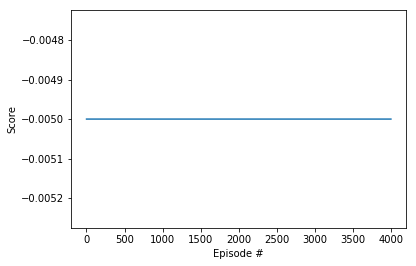

In [10]:
# n_episodes=4000
# max_t=1000 not 100
def ddpg(n_episodes=4000, max_t=1000, print_every=1):
    #scores_deque = deque(maxlen=print_every)
    #scores = []
    mean_scores = []
    scores_window = deque(maxlen=100)  # mean scores from most recent episodes
    moving_avgs = []                               # list of moving averages
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations #[0]
        scores = np.zeros(num_agents) #0
        agent.reset()
        
        for t in range(max_t):
            actions = agent.act(states)   
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations #[0]#[0]   # get the next state
            rewards = env_info.rewards #[0]#[0]                   # get the reward
            dones = env_info.local_done #[0]#[0]                  # see if episode has finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            # save experience to replay buffer, perform learning step at defined interval
            #for s, a, r, ns, d in zip(state, action, reward, next_state, done):
            #    agent.step(s, a, r, ns, d, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
#        scores_deque.append(scores)
#        scores.append(scores)
        #mean_scores = 
        #print(scores)
        mean_scores.append(np.mean(scores)) 
        scores_window.append(mean_scores[-1])         
        moving_avgs.append(np.mean(scores_window))

#        moving_avgs.append(np.mean(scores_window))

        
        if mean_scores[-1] > 0.01:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]), end="")
        if mean_scores[-1] >= 0.5:
            torch.save(agent.actor_local.state_dict(), 'tennis-actor-moving_avgs_256-128.pth')
            torch.save(agent.critic_local.state_dict(), 'tennis-critic-moving_avgs_256-128.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores[-1]))
            
        if moving_avgs[-1] >= 0.5 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes!'.format(i_episode-100))  
            
    #return mean_scores #, moving_avgs
    return moving_avgs



#agent = Agent(state_size=3, action_size=1, random_seed=2)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)



scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()